In [3]:
import SimpleITK as sitk
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
from IPython.display import clear_output
import pprint
import os, sys
import pandas_profiling
import sys
import json
from scipy import ndimage
import nibabel as nib 
from pathlib import Path
sys.path.insert(0, str(Path(r'C:\Users\parkm\Desktop\github\analysis_nifti_for_deeplearning\src\registration_metric.pyy').resolve().parent.parent))
from src.eda_nifti import *
from src.registration_metric import *

In [4]:
nifti_anal =NiftiAnalysis()

In [5]:
task1_nifti_files_list = nifti_anal.recursive_find_all_files(r'C:\Users\parkm\Desktop\github\analysis_nifti_for_deeplearning\data\task1', '.nii.gz')

In [29]:
raw_path = r'C:\Users\parkm\Desktop\github\analysis_nifti_for_deeplearning\data\task1\rawdata\sub-strokecase0001\ses-0001\sub-strokecase0001_ses-0001_dwi.nii.gz'

In [30]:
mask_path = r'C:\Users\parkm\Desktop\github\analysis_nifti_for_deeplearning\data\task1\derivatives\sub-strokecase0001\ses-0001\sub-strokecase0001_ses-0001_msk.nii.gz'

# 1. 원본 단면 확인

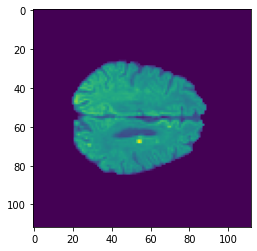

In [31]:
raw_nii = nib.load(raw_path)
raw_nii_array = raw_nii.get_fdata()
raw_nii_array.shape
plt.imshow(raw_nii_array[:,:,49])

# 2. 원본 + n4 correction 확인

In [32]:
input = sitk.ReadImage(raw_path)
image = sitk.Cast(input, sitk.sitkFloat32)
# print(type(image))
correctedImg = sitk.N4BiasFieldCorrection(image)
sitk.WriteImage(correctedImg, 'test.nii.gz') # outfile is just string variable or path

In [33]:
nii = nib.load('test.nii.gz')
nii_array = nii.get_fdata()
nii_array.shape

(112, 112, 73)

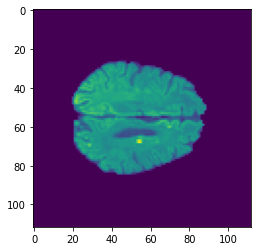

In [34]:
plt.imshow(nii_array[:,:,49])

# 3. 원본에서 라벨 마스크 아웃 + n4 correction
- antspy로 진행하면 antsimage로 작업하고 바로 저장하면되는데, 리눅스 환경 x, 대충 몇개만 돌려서 확인해보는 용도

In [35]:
raw_nii = nib.load(raw_path)
raw_nii_array = raw_nii.get_fdata()
raw_affine = raw_nii.affine

In [36]:
mask_nii = nib.load(mask_path)

In [37]:
mask_nii_array = mask_nii.get_fdata()

In [38]:
raw_nii_array.shape

(112, 112, 73)

In [39]:
mask_nii_array.shape

(112, 112, 73)

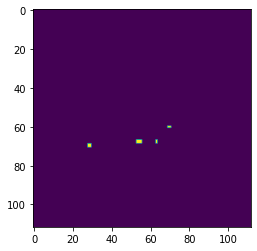

In [40]:
plt.imshow(mask_nii_array[:,:,49])

In [41]:
np.unique(np.ravel(raw_nii_array[:,:,49]))

array([  0.        ,  14.88266551,  21.6959706 , ..., 409.17928185,
       444.7661785 , 464.54226495])

In [42]:
np.unique(np.ravel(mask_nii_array[:,:,49]))

array([0., 1.])

In [43]:
raw_max_level_pixel = np.ravel(raw_nii_array).max()

In [44]:
mask_out_array = raw_nii_array + (mask_nii_array * raw_max_level_pixel*100)

In [45]:
mask_out_array[mask_out_array>raw_max_level_pixel+5] = 0

In [46]:
np.unique(np.ravel(mask_out_array[:,:,49]))

array([  0.        ,  14.88266551,  21.6959706 , ..., 367.03450323,
       372.52487946, 381.65965439])

In [47]:
np.unique(np.ravel(mask_out_array[:,:,49]))

array([  0.        ,  14.88266551,  21.6959706 , ..., 367.03450323,
       372.52487946, 381.65965439])

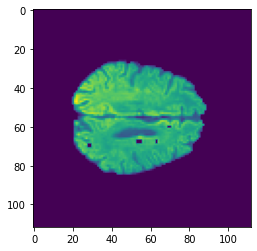

In [48]:
plt.imshow(mask_out_array[:,:,49])

In [49]:
img = nib.Nifti1Image(mask_out_array, raw_affine) 
img.to_filename('raw_mask_out.nii.gz')

In [50]:
input = sitk.ReadImage('raw_mask_out.nii.gz')
image = sitk.Cast(input, sitk.sitkFloat32)
# print(type(image))
correctedImg = sitk.N4BiasFieldCorrection(image)
sitk.WriteImage(correctedImg, 'n4_raw_mask_out.nii.gz')

In [ ]:
def 